In [1]:
import torch
import matplotlib.pyplot as plt
import numpy as np

In [151]:
N_HIDDEN = 0
WIDTH = 12

# 4K
RESOLUTION_X = 3840
RESOLUTION_Y = 2160

# 1080p
# RESOLUTION_X = 1920
# RESOLUTION_Y = 1080

In [152]:
def getLayer(in_dims, out_dims):
    layer = torch.nn.Conv2d(in_dims, out_dims, 3)
    torch.nn.init.uniform_(layer.weight, -1.0, 1.0)
    return layer

In [175]:
def getModel():
    layers = [
        getLayer(2, WIDTH),
        torch.nn.Tanh()
    ]

    for i in range(N_HIDDEN):
        layers.append(getLayer(WIDTH, WIDTH))
        layers.append(torch.nn.Tanh())

    layers.append(getLayer(WIDTH, 3))
    layers.append(torch.nn.Sigmoid())

    model = torch.nn.Sequential(*layers)

    model = model.to(device)
    
    return model

(-0.5, 3819.5, 2139.5, -0.5)

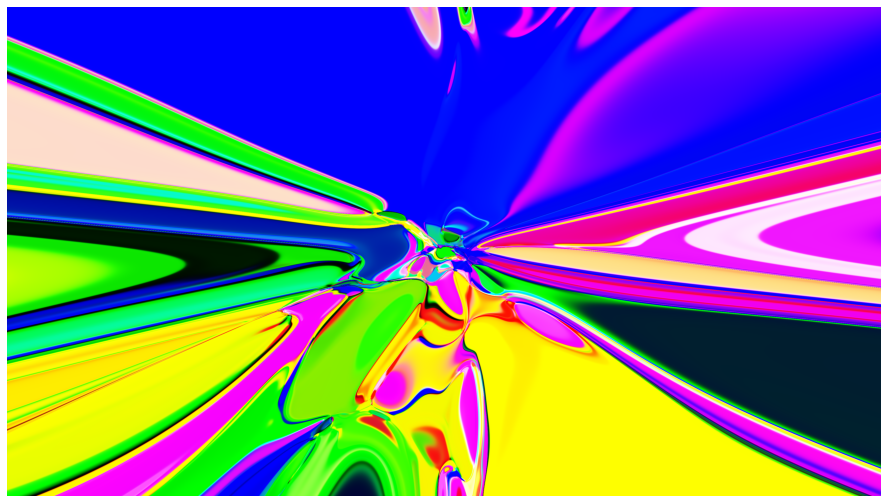

In [178]:
device = torch.device('cuda')

model = getModel()

coords = np.mgrid[0:1:(1/RESOLUTION_Y), 0:1:(1/RESOLUTION_X)]
coords = torch.tensor(coords).to(torch.float).unsqueeze(0).to(device)
coords = (coords * 2) - 1

with torch.no_grad():
    out = model(coords)
    
out = out[0].to('cpu').numpy()
out = np.transpose(out, [1, 2, 0])

plt.subplots(figsize=(16, 9))
plt.imshow(out)
plt.axis('off')

In [135]:
plt.imsave(fname='conv_morefilters.png', arr=out, format='png')